In [1]:
from sklearn.svm import SVC

In [3]:
clf=SVC(kernel='linear')

In [4]:
data_points=[[1,2],[1,5],[2,2],[7,5],[9,4],[8,2]]
label=[1,1,1,0,0,0]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

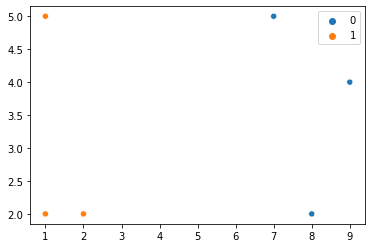

In [16]:
# 시각화 (산점도)
x1= [data_points[i][0] for i in range(len(data_points))]
y1= [data_points[i][1] for i in range(len(data_points))]
sns.scatterplot(x1, y1, hue=label)

In [17]:
clf.fit(data_points, label)

SVC(kernel='linear')

In [21]:
clf.predict([[3,2], [1,3], [7,4]]) 
# 예측할 때는 2차원 이상 구조로

array([1, 1, 0])

In [22]:
clf.support_vectors_

array([[7., 5.],
       [8., 2.],
       [2., 2.]])

In [23]:
clf=SVC(C=1) #오류를 어느정도 허용하겠느냐?, 기본값:1
#C값이 클수록 하드마진(오류 허용 안함)
#C값이 작을수록 소프트마진(오류 허용함)
#C값은 답이 없음. 직접 다양하게 넣어보면서 테스트 및 검증, 튜닝해야 함

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

In [25]:
import pandas as pd

In [26]:
df=pd.read_csv("f:/data/basketball_stat.csv")

In [27]:
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)

In [28]:
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train, test = train_test_split(df, test_size=0.3, random_state=928)

In [31]:
import pickle

In [32]:
with open("basketball_train.pkl", "wb") as train_data:
    pickle.dump(train, train_data)

In [33]:
with open("basketball_test.pkl", "wb") as test_data:
    pickle.dump(test, test_data)

In [34]:
#피클로 저장된 파일을 불러오기
with open("basketball_train.pkl", "rb") as train_data:
    mytrain=pickle.load(train_data)

In [35]:
with open("basketball_test.pkl", "rb") as test_data:
    mytest=pickle.load(test_data)

In [36]:
mytest

,Player,Pos,3P,TRB,BLK
95,Nikola Vucevic,C,0.3,10.4,1.0
51,Dwight Howard,C,0.0,12.7,1.2
25,Andre Drummond,C,0.0,13.8,1.1
13,Avery Bradley,SG,2.0,6.1,0.2
97,Dion Waiters,SG,1.8,3.3,0.4
44,Roy Hibbert,C,0.0,3.2,1.0
80,Iman Shumpert,SG,1.2,2.9,0.4
32,Manu Ginobili,SG,1.3,2.3,0.2
3,Chris Andersen,C,0.0,2.6,0.6
11,Andrew Bogut,C,0.0,8.1,0.9


In [37]:
train

,Player,Pos,3P,TRB,BLK
31,Pau Gasol,C,0.9,7.8,1.1
49,Rodney Hood,SG,1.9,3.4,0.2
18,DeMarcus Cousins,C,1.8,11.0,1.3
38,A.J. Hammons,C,0.2,1.6,0.6
29,Channing Frye,C,1.9,3.9,0.5
...,...,...,...,...,...
91,Karl-Anthony Towns,C,1.2,12.3,1.3
28,Evan Fournier,SG,1.9,3.1,0.1
19,Allen Crabbe,SG,1.7,2.9,0.3
85,Marreese Speights,C,1.3,4.5,0.5


In [38]:
x_train=train[['3P', 'BLK']]
y_train=train[['Pos']]

In [39]:
def svc_param_selection(x, y, nfolds):
    svm_parameters=[{'kernel':['rbf'],
                     'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
                     'C':[0.001,0.01,1,10,100,1000] }]
    clf=GridSearchCV(SVC(), svm_parameters, cv=nfolds)
    clf.fit(x, y)
    print(clf.best_params_)
    return clf # 모델 리턴

In [40]:
clf=svc_param_selection(x_train, y_train.values.ravel(), 10)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [41]:
clf=SVC(C=1, gamma=1)
clf.fit(x_train, y_train)

C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=1)

In [42]:
y_test=test[['Pos']]
x_test=test[['3P', 'BLK']]

In [43]:
pred=clf.predict(x_test)

In [44]:
y_test
pred
accuracy_score(y_test, pred)

0.9333333333333333